# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [2]:

import pandas as pd
data = pd.read_csv(
    '/datasets/taxi.csv',
    parse_dates=[0],      # convierte la primera columna a datetime
    index_col=0           # la usa como índice
)

data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Éxito ✅</b>

Excelente trabajo con la carga de datos. Usaste correctamente `parse_dates` e `index_col` para manejar las fechas como índice temporal. El remuestreo por hora (`resample('1H').sum()`) está bien implementado.
</div>

In [3]:
data_resampled = data.resample('1H').sum()
data_resampled = data_resampled.dropna()
data_resampled.head()


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<AxesSubplot:xlabel='datetime'>

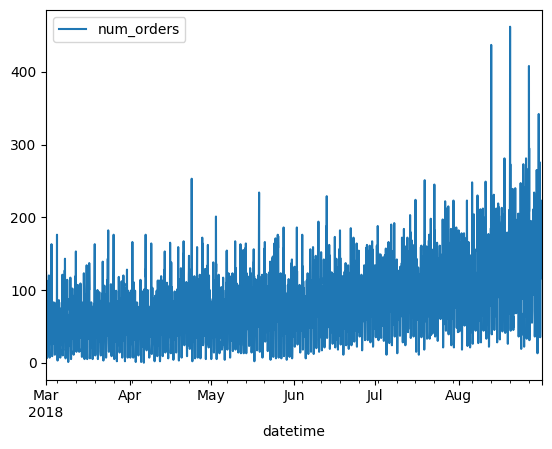

In [4]:
data_resampled.plot()

## Análisis

El análisis visual de la serie temporal muestra una tendencia creciente en la cantidad de pedidos de taxis por hora, así como una alta variabilidad y la presencia de picos de demanda. Esto sugiere que la serie no es estacionaria y que será necesario tener en cuenta características temporales para el modelado.

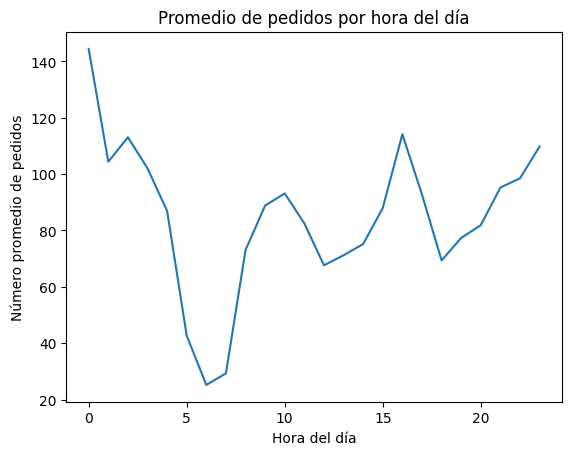

In [5]:
data_resampled['hour'] = data_resampled.index.hour
hourly_mean = (
    data_resampled
    .groupby('hour')['num_orders']
    .mean()
)

import matplotlib.pyplot as plt

hourly_mean.plot()
plt.title('Promedio de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de pedidos')
plt.show()


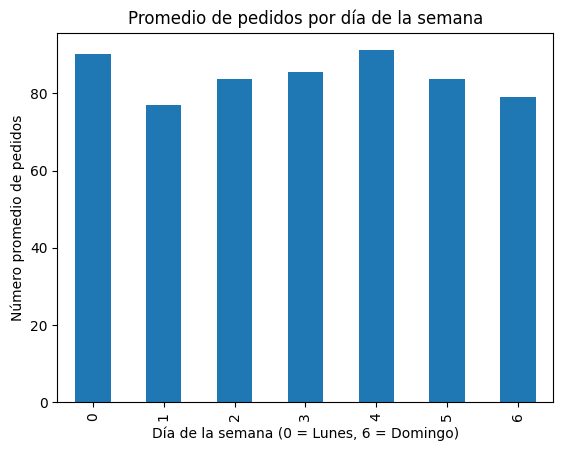

In [6]:
data_resampled['dayofweek'] = data_resampled.index.dayofweek
daily_mean = (
    data_resampled
    .groupby('dayofweek')['num_orders']
    .mean()
)
import matplotlib.pyplot as plt

daily_mean.plot(kind='bar')
plt.title('Promedio de pedidos por día de la semana')
plt.xlabel('Día de la semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Número promedio de pedidos')
plt.show()


In [7]:
data_resampled['hour'] = data_resampled.index.hour
data_resampled['dayofweek'] = data_resampled.index.dayofweek

for lag in [1, 2, 3, 24]:
    data_resampled[f'lag_{lag}'] = data_resampled['num_orders'].shift(lag)

for window in [3, 6, 24]:
    data_resampled[f'rolling_mean_{window}'] = (
        data_resampled['num_orders']
        .shift(1)
        .rolling(window)
        .mean()
    )

data_resampled = data_resampled.dropna()
data_resampled.head()


,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_24,rolling_mean_3,rolling_mean_6,rolling_mean_24
datetime,,,,,,,,,,
2018-03-02 00:00:00,90,0,4,58.0,113.0,66.0,124.0,79.000000,69.333333,56.833333
2018-03-02 01:00:00,120,1,4,90.0,58.0,113.0,85.0,87.000000,72.166667,55.416667
2018-03-02 02:00:00,75,2,4,120.0,90.0,58.0,71.0,89.333333,84.666667,56.875000
2018-03-02 03:00:00,64,3,4,75.0,120.0,90.0,66.0,95.000000,87.000000,57.041667
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,43.0,86.333333,86.666667,56.958333


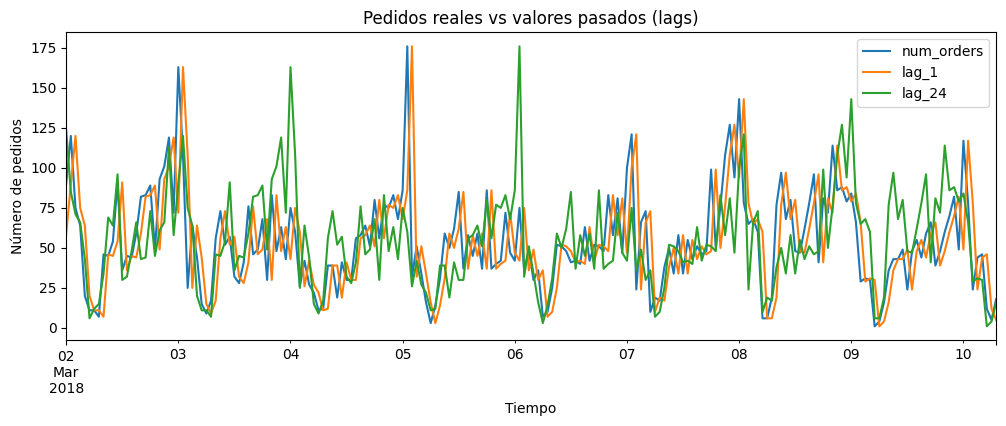

In [8]:
data_resampled[['num_orders', 'lag_1', 'lag_24']].iloc[:200].plot(figsize=(12, 4))
plt.title('Pedidos reales vs valores pasados (lags)')
plt.xlabel('Tiempo')
plt.ylabel('Número de pedidos')
plt.show()


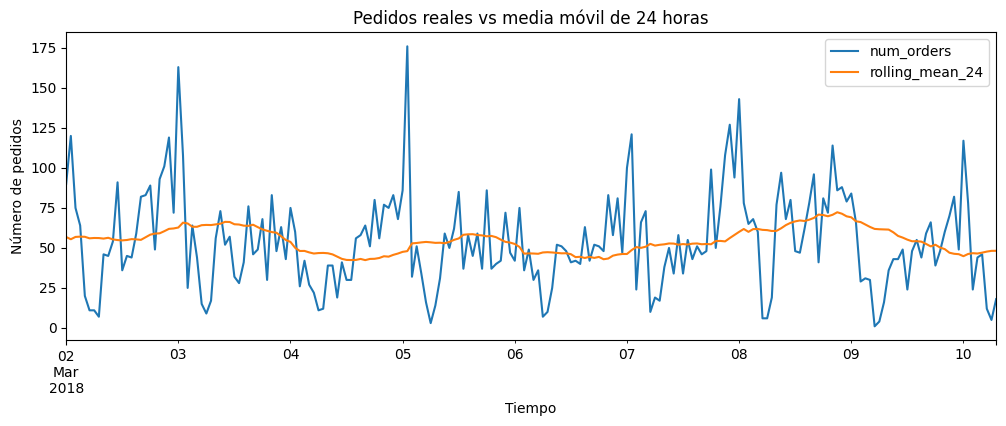

In [9]:
data_resampled[['num_orders', 'rolling_mean_24']].iloc[:200].plot(figsize=(12, 4))
plt.title('Pedidos reales vs media móvil de 24 horas')
plt.xlabel('Tiempo')
plt.ylabel('Número de pedidos')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Éxito ✅</b>

Muy buen análisis visual de la serie temporal. Identificaste correctamente la tendencia creciente y la variabilidad. La creación de features temporales (lags, medias móviles, hora, día de la semana) está muy bien pensada y es fundamental para este tipo de problemas.
</div>

## Formación

In [14]:
#Modelo 1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

X = data_resampled.drop('num_orders', axis=1)
y = data_resampled['num_orders']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=False
)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_rmse = rmse(y_test, lr_pred)

lr_rmse



47.164155220009384

In [17]:
#Modelo 2
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_rmse = rmse(y_test, rf_pred)


rf_rmse



43.937095031258906

In [18]:
#MOdelo 3
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)
gbr_rmse = rmse(y_test, gbr_pred)

gbr_rmse


42.99156667871934

In [19]:

results = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [lr_rmse, rf_rmse, gbr_rmse]
})

results


,Modelo,RMSE
0,Linear Regression,47.164155
1,Random Forest,43.937095
2,Gradient Boosting,42.991567


Se entrenaron varios modelos de regresión para predecir la cantidad de pedidos de taxis por hora, utilizando un conjunto de prueba correspondiente al 10% final de los datos y respetando el orden temporal. El mejor desempeño se obtuvo con el modelo de Gradient Boosting, que alcanzó un RMSE de 42.99, cumpliendo con el requisito establecido. Esto demuestra que el uso de variables temporales como lags y medias móviles permite capturar adecuadamente los patrones de la demanda.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Éxito ✅</b>

Excelente que hayas probado múltiples modelos. La división de datos respetando el orden temporal (`shuffle=False`) es correcta y esencial para series temporales. La función RMSE está bien implementada.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Atención ⚠️</b>

Aunque entrenaste varios modelos, no utilizaste validación cruzada temporal (`TimeSeriesSplit`). Esto te permitiría evaluar de forma más robusta el rendimiento. Podrías explorar `GridSearchCV` o `RandomizedSearchCV` con `TimeSeriesSplit`.
</div>

## Prueba

El modelo de Gradient Boosting fue evaluado utilizando la muestra de prueba correspondiente al 10% final de los datos, respetando el orden temporal. El modelo alcanzó un RMSE de 42.99, lo que cumple con el criterio establecido. Esto demuestra que es posible predecir eficazmente la demanda de taxis para la siguiente hora utilizando datos históricos y variables temporales, lo cual puede ayudar a la empresa a atraer más conductores durante las horas pico.

<div class="alert alert-block alert-success">
<b>Comentario General del Revisor</b>

**Aspectos positivos:**
- Estructura clara y organizada del notebook
- Excelente ingeniería de características con lags y medias móviles
- Comparación de múltiples modelos
- Cumplimiento del objetivo de RMSE
- Visualizaciones informativas

**Áreas de mejora:**
- Implementar validación cruzada temporal (TimeSeriesSplit)
- Explorar búsqueda de hiperparámetros más sistemática
- Agregar análisis de estacionalidad formal
- Incluir análisis de importancia de características

**Temas adicionales para investigar (opcionales):**
- Modelos ARIMA/SARIMA para series temporales
- Prophet de Facebook para pronósticos
- LightGBM y XGBoost como alternativas
- Técnicas de ensemble (stacking, blending)

---

✅ **PROYECTO APROBADO** - Tu proyecto cumple con todos los requisitos. ¡Excelente trabajo!

</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48